Student Name : Mohit Patil

Email ID : mohitz4418@gmail.com

### Problem Statement.

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

### 1. Import necessary libraries and filter warnings.

In [1]:
# Filter Warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 2. Import the country-data.csv.

In [3]:
# Reading the Dataset.

country = pd.read_csv("C:\\Users\\Mohit'z\\Desktop\\Upgrad\\Clustering Assignment\\Country-data.csv")

In [4]:
# Check the top 5 rows of dataset.

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### 3. Check the structure of data.

In [5]:
# Check the shape of dataset.

country.shape

(167, 10)

In [6]:
# Understanding the data.

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# Describe the data.

country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 4. Data quality check and missing values.

In [8]:
# Checking for null values in dataset.

country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
# Checking for duplicate data.

country.duplicated(subset = ['country'], keep = False).sum()

0

#### Observation:
- Data set is having 167 country data of 10 features of each.
- There is no missing value or duplicate rows in the dataset

### 4.1. Data conversion

#### Columns 'exports', 'health' and 'imports' are given as %age of GDP per capita. So lets convert it to actual value

In [10]:
# Converting imports, exports and health percentages values to absolute values.

country['imports'] = country['imports'] * country['gdpp']/100
country['exports'] = country['exports'] * country['gdpp']/100
country['health'] = country['health'] * country['gdpp']/100

In [11]:
# Check for the conversion result.

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [12]:
# Check shape of dataset after conversion.

country.shape

(167, 10)

### 4.2. Check for Outliers.

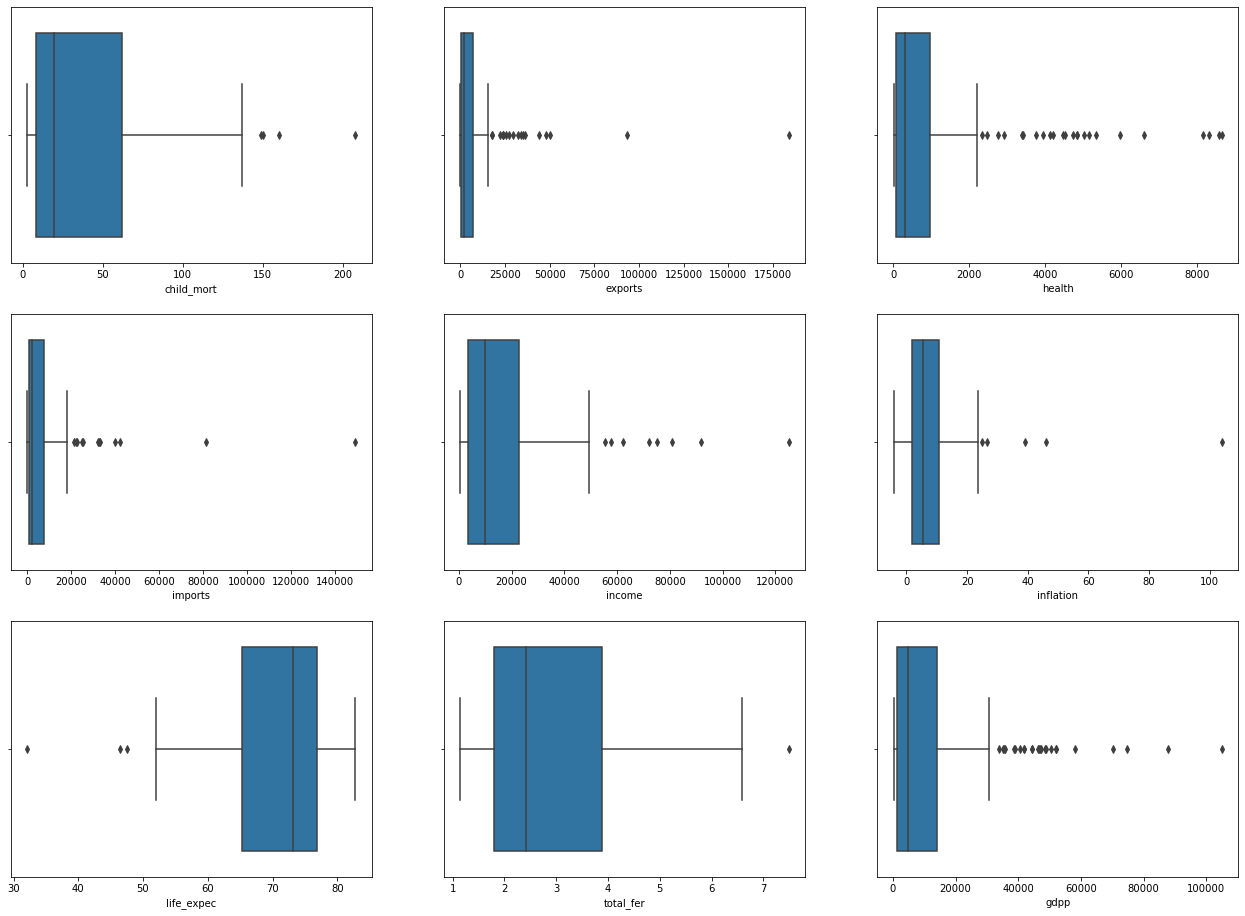

In [13]:
# Check the outliers for all numeric columns in dataframe using boxplot.

plt.figure(figsize = (22,16))
feature = country.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(country[i[1]])

#### Observation:
- There are outliers in every columns.

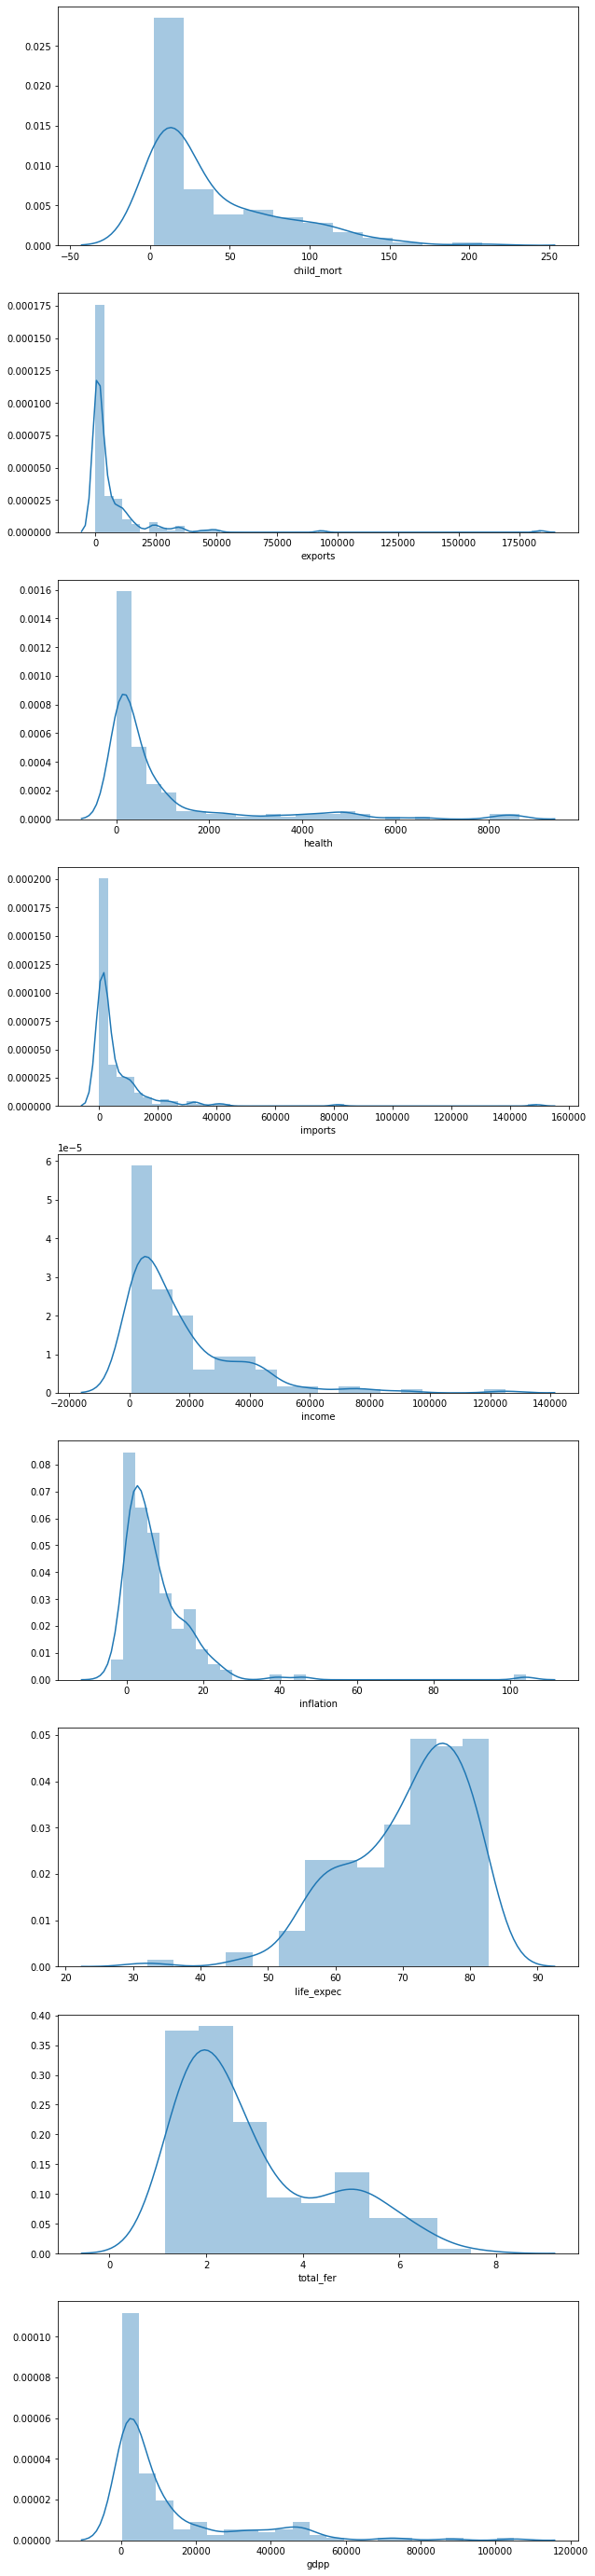

In [14]:
# Check values in numerical columns using distplot.

plt.figure(figsize = (10,50))
feature = country.columns[1:]
for i in enumerate(feature):
    plt.subplot(9,1, i[0]+1)
    sns.distplot(country[i[1]])

#### Observation:
- Every column in dataset has data to left skewed except the life_expec column it is right skewed.

### 4.3. Bivariate Analysis for Continous - Continous variables.

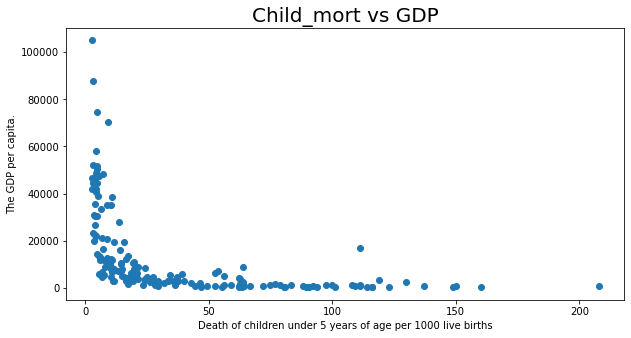

In [15]:
# Bivariate analysis for "child_mort", "gdpp" variables.

plt.figure(figsize = (10, 5))
plt.scatter(country["child_mort"], country["gdpp"])
plt.xlabel("Death of children under 5 years of age per 1000 live births")
plt.ylabel("The GDP per capita.")
plt.title("Child_mort vs GDP", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can see that the more the GDP of country there has less child mortality rate.

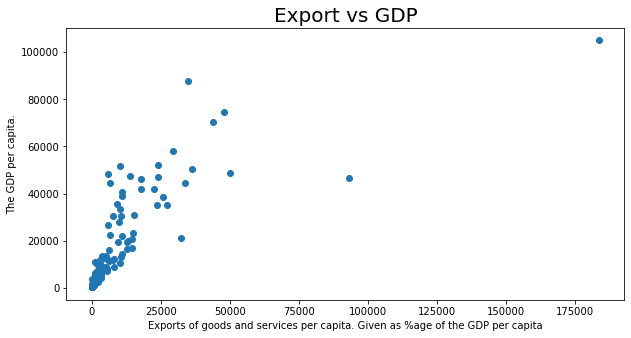

In [16]:
# Bivariate analysis for "exports", "gdpp" variables.

plt.figure(figsize = (10, 5))
plt.scatter(country["exports"], country["gdpp"])
plt.xlabel("Exports of goods and services per capita. Given as %age of the GDP per capita")
plt.ylabel("The GDP per capita.")
plt.title("Export vs GDP", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the more export done by country more its GDp increases

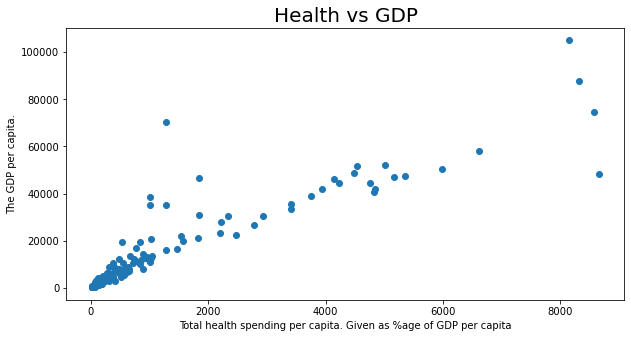

In [17]:
# Bivariate analysis for "health", "gdpp" variables.

plt.figure(figsize = (10, 5))
plt.scatter(country["health"], country["gdpp"])
plt.xlabel("Total health spending per capita. Given as %age of GDP per capita")
plt.ylabel("The GDP per capita.")
plt.title("Health vs GDP", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the country which has high GDP has higher rate of spending on health.

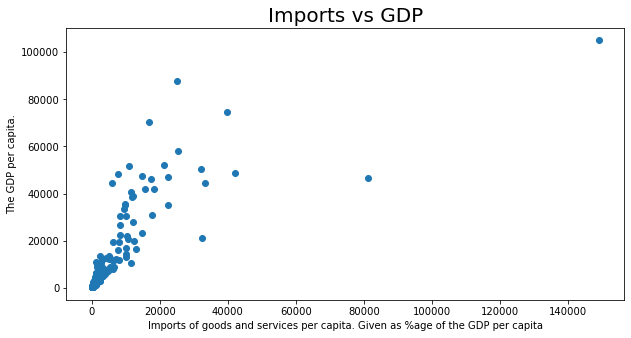

In [18]:
# Bivariate analysis for "imports", "gdpp" variables.

plt.figure(figsize = (10, 5))
plt.scatter(country["imports"], country["gdpp"])
plt.xlabel("Imports of goods and services per capita. Given as %age of the GDP per capita")
plt.ylabel("The GDP per capita.")
plt.title("Imports vs GDP", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the more import done by country more its GDP increases

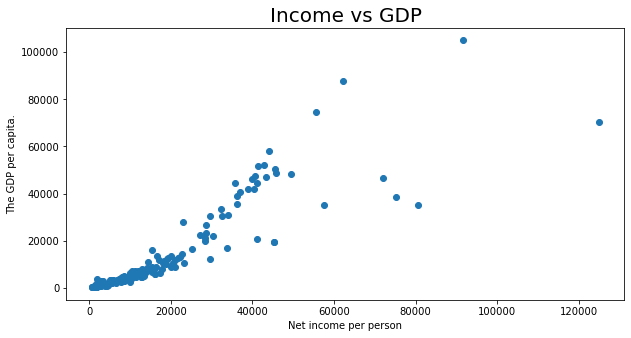

In [19]:
# Bivariate analysis for "income", "gdpp" variables.

plt.figure(figsize = (10, 5))
plt.scatter(country["income"], country["gdpp"])
plt.xlabel("Net income per person")
plt.ylabel("The GDP per capita.")
plt.title("Income vs GDP", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the country which has high GDP has higher income per person in that country.

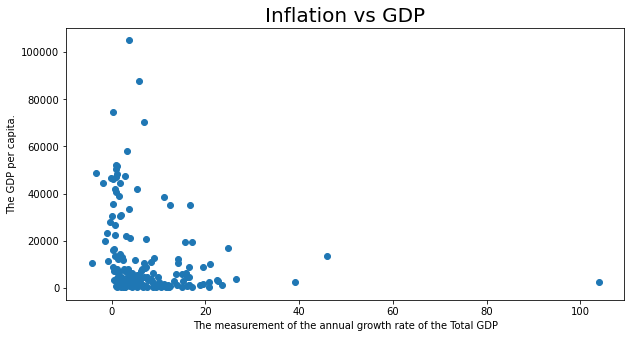

In [20]:
# Bivariate analysis for "inflation", "gdpp" variables.

plt.figure(figsize = (10, 5))
plt.scatter(country["inflation"], country["gdpp"])
plt.xlabel("The measurement of the annual growth rate of the Total GDP")
plt.ylabel("The GDP per capita.")
plt.title("Inflation vs GDP", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the country which has high GDP has less inflation rate.

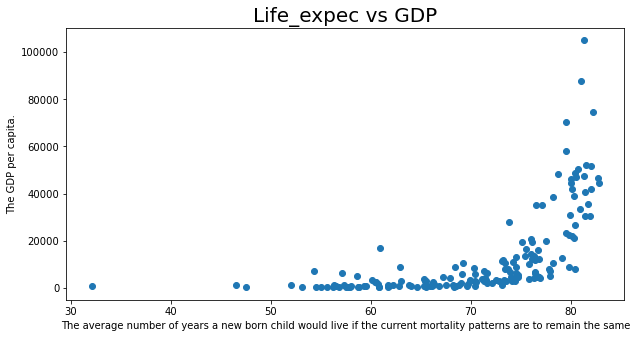

In [21]:
# Bivariate analysis for "life_expec", "gdpp" variables.

plt.figure(figsize = (10, 5))
plt.scatter(country["life_expec"], country["gdpp"])
plt.xlabel("The average number of years a new born child would live if the current mortality patterns are to remain the same")
plt.ylabel("The GDP per capita.")
plt.title("Life_expec vs GDP", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the country which has high GDP has high life expectancy.

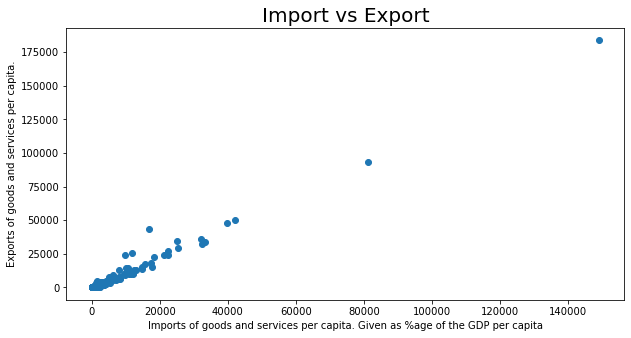

In [22]:
# Bivariate analysis for "imports", "exports" variables.

plt.figure(figsize = (10, 5))
plt.scatter(country["imports"], country["exports"])
plt.xlabel("Imports of goods and services per capita. Given as %age of the GDP per capita")
plt.ylabel("Exports of goods and services per capita.")
plt.title("Import vs Export", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the more export done by country also does import.

### 4.5. Bivariate Analysis for Continous - Categorical variables.

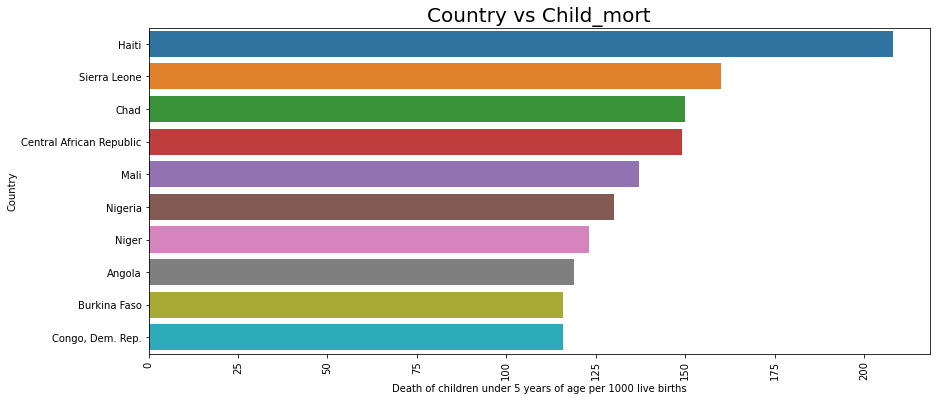

In [23]:
# Bivariate analysis for "country" "child_mort" variables.

plt.figure(figsize = (14, 6))
country_vs_child_mort = country[['country', 'child_mort']].sort_values('child_mort', ascending = False).head(10)
sns.barplot(x = "child_mort", y = "country", data = country_vs_child_mort)
plt.xlabel("Death of children under 5 years of age per 1000 live births")
plt.xticks(rotation = 90)
plt.ylabel("Country")
plt.title("Country vs Child_mort", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the top 10 contries which has high child_mort rate.

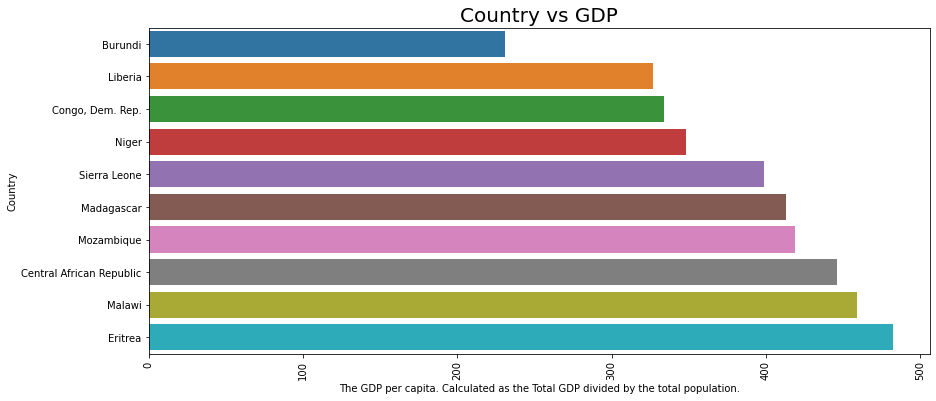

In [24]:
# Bivariate analysis for "country" "gdpp" variables.

plt.figure(figsize = (14, 6))
country_vs_gdpp = country[['country', 'gdpp']].sort_values('gdpp', ascending = True).head(10)
sns.barplot(x = "gdpp", y = "country", data = country_vs_gdpp)
plt.xlabel("The GDP per capita. Calculated as the Total GDP divided by the total population.")
plt.xticks(rotation = 90)
plt.ylabel("Country")
plt.title("Country vs GDP", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the top 10 contries which has low GDP rate.

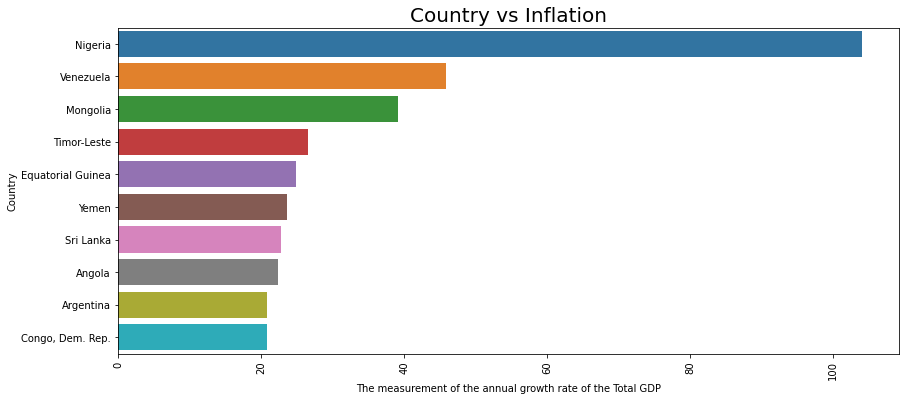

In [25]:
# Bivariate analysis for "country" "inflation" variables.

plt.figure(figsize = (14, 6))
country_vs_inflation = country[['country', 'inflation']].sort_values('inflation', ascending = False).head(10)
sns.barplot(x = "inflation", y = "country", data = country_vs_inflation)
plt.xlabel("The measurement of the annual growth rate of the Total GDP")
plt.xticks(rotation = 90)
plt.ylabel("Country")
plt.title("Country vs Inflation", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the top 10 contries which has high inflation rate.

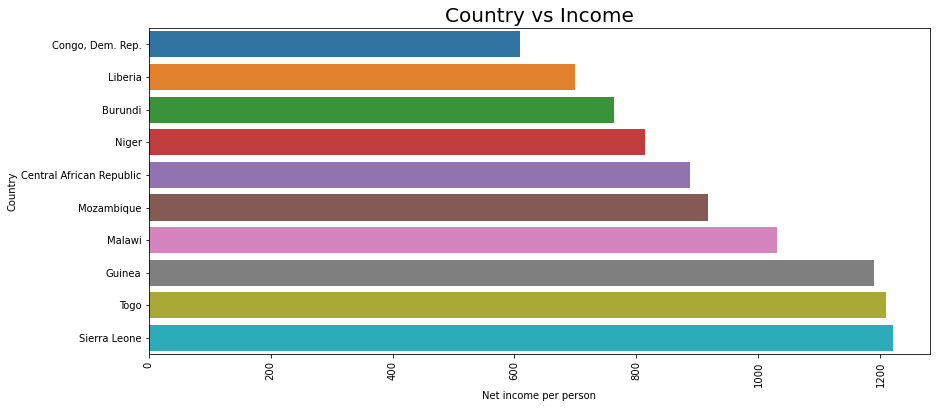

In [26]:
# Bivariate analysis for "country" "income" variables.

plt.figure(figsize = (14, 6))
country_vs_income = country[['country', 'income']].sort_values('income', ascending = True).head(10)
sns.barplot(x = "income", y = "country", data = country_vs_income)
plt.xlabel("Net income per person")
plt.xticks(rotation = 90)
plt.ylabel("Country")
plt.title("Country vs Income", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the top 10 contries which has low income per person rate.

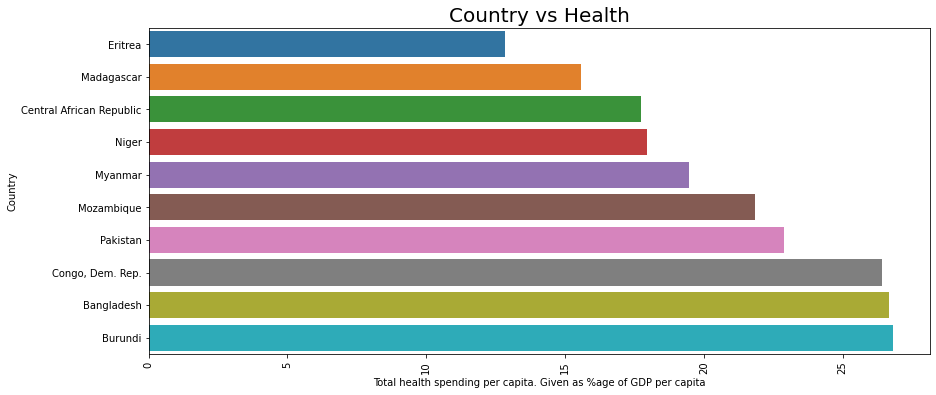

In [27]:
# Bivariate analysis for "country" "health" variables.

plt.figure(figsize = (14, 6))
country_vs_health = country[['country', 'health']].sort_values('health', ascending = True).head(10)
sns.barplot(x = "health", y = "country", data = country_vs_health)
plt.xlabel("Total health spending per capita. Given as %age of GDP per capita")
plt.xticks(rotation = 90)
plt.ylabel("Country")
plt.title("Country vs Health", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the top 10 contries which has low spending on health.

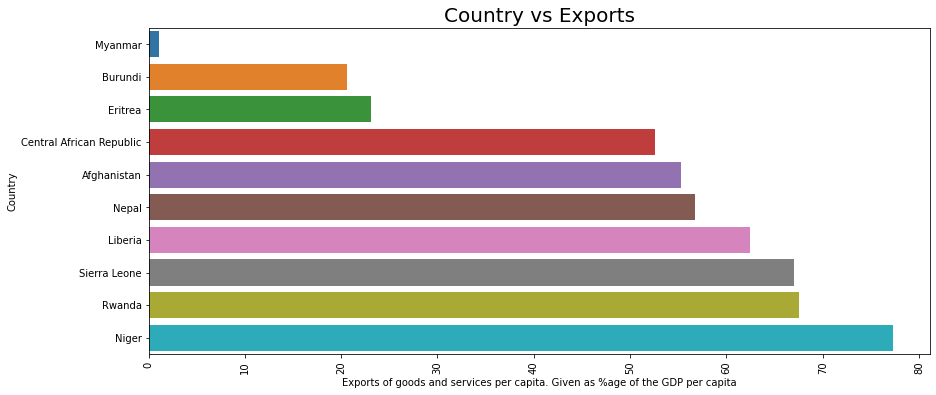

In [28]:
# Bivariate analysis for "country" "exports" variables.

plt.figure(figsize = (14, 6))
country_vs_exports = country[['country', 'exports']].sort_values('exports', ascending = True).head(10)
sns.barplot(x = "exports", y = "country", data = country_vs_exports)
plt.xlabel("Exports of goods and services per capita. Given as %age of the GDP per capita")
plt.xticks(rotation = 90)
plt.ylabel("Country")
plt.title("Country vs Exports", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the top 10 contries which has low export rate.

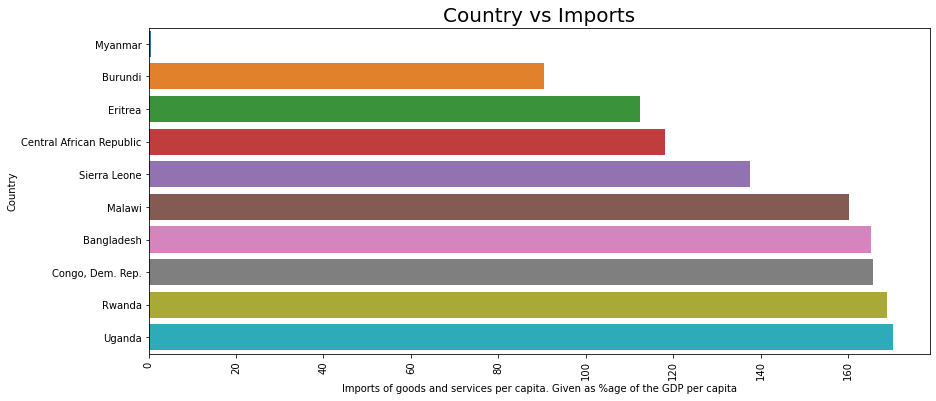

In [29]:
# Bivariate analysis for "country" "imports" variables.

plt.figure(figsize = (14, 6))
country_vs_imports = country[['country', 'imports']].sort_values('imports', ascending = True).head(10)
sns.barplot(x = "imports", y = "country", data = country_vs_imports)
plt.xlabel("Imports of goods and services per capita. Given as %age of the GDP per capita")
plt.xticks(rotation = 90)
plt.ylabel("Country")
plt.title("Country vs Imports", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the top 10 contries which has low import rate.

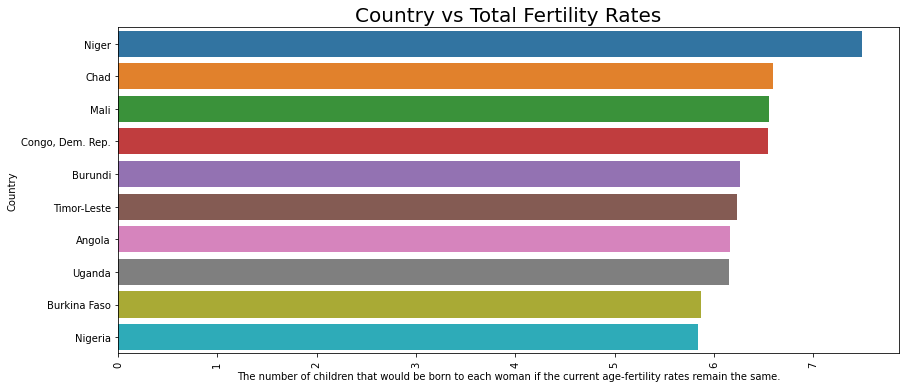

In [30]:
# Bivariate analysis for "country" "total_fer" variables.

plt.figure(figsize = (14, 6))
country_vs_total_fer = country[['country', 'total_fer']].sort_values('total_fer', ascending = False).head(10)
sns.barplot(x = "total_fer", y = "country", data = country_vs_total_fer)
plt.xlabel("The number of children that would be born to each woman if the current age-fertility rates remain the same.")
plt.xticks(rotation = 90)
plt.ylabel("Country")
plt.title("Country vs Total Fertility Rates", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the top 10 contries which has high total fertility rate.

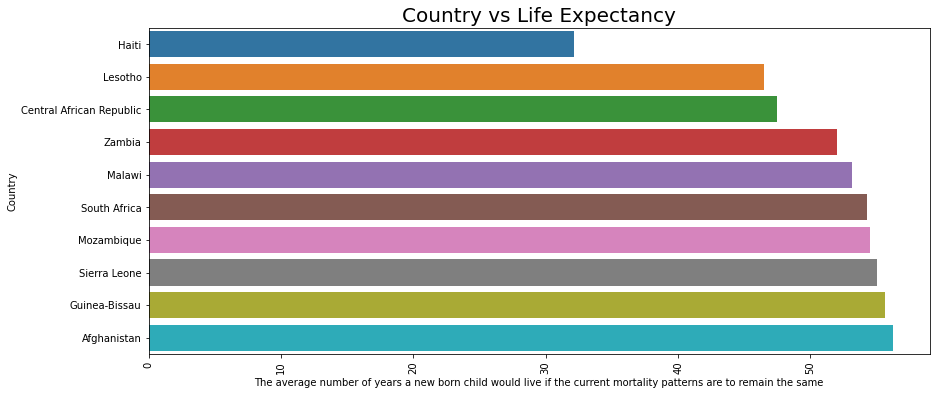

In [31]:
# Bivariate analysis for "country" "life_expec" variables.

plt.figure(figsize = (14, 6))
country_vs_life_expec = country[['country', 'life_expec']].sort_values('life_expec', ascending = True).head(10)
sns.barplot(x = "life_expec", y = "country", data = country_vs_life_expec)
plt.xlabel("The average number of years a new born child would live if the current mortality patterns are to remain the same")
plt.xticks(rotation = 90)
plt.ylabel("Country")
plt.title("Country vs Life Expectancy", fontsize = 20)
plt.show()

#### Observation:
- From above plot we can observe that the top 10 contries which has low life expectancy rate.

#### Observation:
From above plots we can observe that it has some common contries which are 'congo, Dem. Rep.', 'Niger', 'Sierra', 'Leone', 'Central African Republic' in the profile of gdpp, child_mort and income columns.

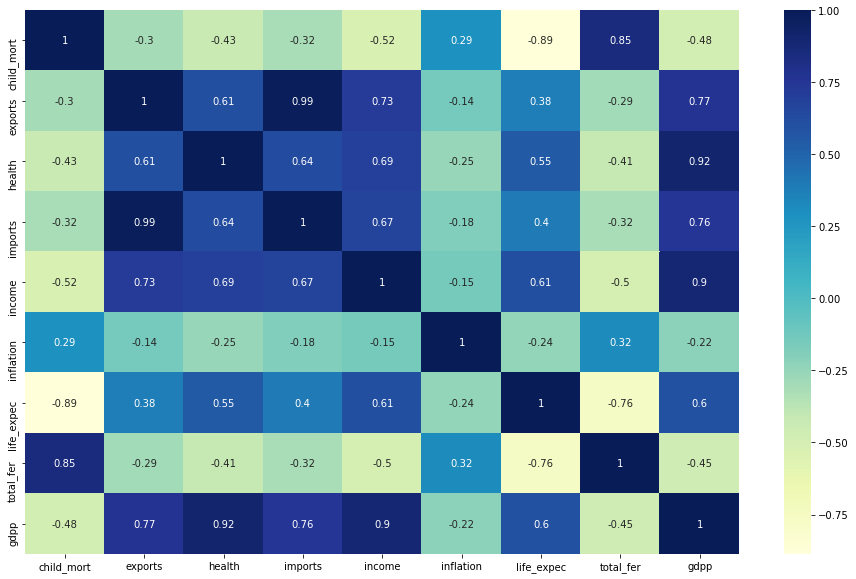

In [32]:
# Corrleation of the country dataset

plt.figure(figsize= (16,10))
sns.heatmap(country.corr(), annot = True, cmap = "YlGnBu")
plt.show()

#### Observation:
- Most of the columns are not normally distributed.
- There are some columns which are highly correlated with other column. like gdpp and income.

### 5. Outlier Treatment.

- We have outliers in dataset. But we can't remove them since we have less data. So we will cap the outliers.
- In dataset we will cap all columns to upper capping expcept child_mort column beacause we need that data to identify countries which has high child_mort rate.
- We will impute outlier to upper capping at 0.99 percentile.

In [33]:
# Selecting the numerical columns and dropping the country

country_numeric = country.drop('country', axis =1)
country_numeric.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [34]:
# list cols for upper caping.

cols = ['exports', 'health', 'imports','income', 'inflation', 'life_expec','total_fer','gdpp']

In [35]:
# Check quantile values before capping.

country_numeric[cols].describe(percentiles= [0.01, 0.25, 0.5, 0.75, 0.99])

,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
99%,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [36]:
# Perform Upper Caping to selected columns.

cap_perc = 0.99
for i in cols:
    Upper_Capping = round(country_numeric[i].quantile(cap_perc), 2)
    country_numeric[i] = country_numeric[i].apply(lambda x : Upper_Capping if x > Upper_Capping else x)

In [37]:
# Check result after capping.

country_numeric[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,6538.214776,1054.206617,5873.135222,16857.550898,7.380994,70.551138,2.942216,12756.826347
std,11415.308590,1790.845323,9422.700869,17957.012855,7.793330,8.886987,1.498235,17430.208938
min,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
99%,55136.308400,8352.982600,46629.102600,81883.160000,39.975200,82.257800,6.553400,76125.920000
max,64794.260000,8410.330000,55371.390000,84374.000000,41.480000,82.370000,6.560000,79088.000000


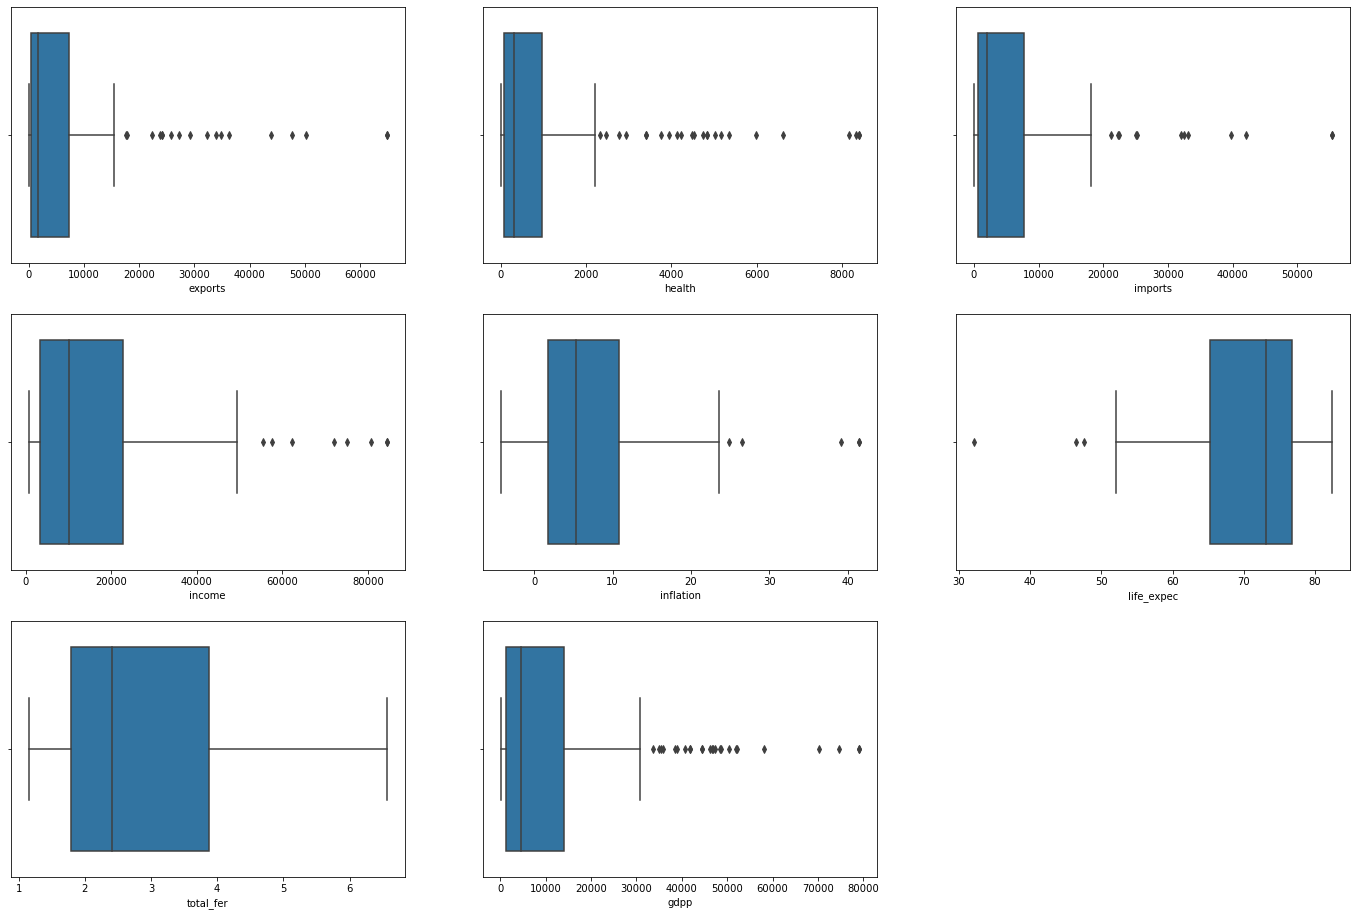

In [38]:
# Plot the boxplot to check for outliers after capping.

plt.figure(figsize = (24,16))
feature = country_numeric[cols].columns[:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(country_numeric[cols][i[1]])

Observation : 
- There are still some outliers present in the dataset. but we will continue with this otherwise more capping will lead to loss of data from countries which requires aid.

### 6. Feature Scalling.

In [39]:
# Check dataframe columns.

country_numeric.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [40]:
# Use the min max scalling

# Create a scalling object.
scaler = MinMaxScaler()

In [41]:
# Perform fit_transform.

country_scaled = scaler.fit_transform(country_numeric)

In [42]:
# Check the result.

country_scaled

array([[4.26484907e-01, 8.36863963e-04, 3.46486091e-03, ...,
        4.79411180e-01, 8.63216266e-01, 4.08334073e-03],
       [6.81596884e-02, 1.76580780e-02, 3.03749369e-02, ...,
        8.79252039e-01, 9.24214418e-02, 4.89366829e-02],
       [1.20253165e-01, 2.64157894e-02, 2.06204964e-02, ...,
        8.83230555e-01, 3.21626617e-01, 5.36287203e-02],
       ...,
       [1.00778968e-01, 1.45404661e-02, 9.14352123e-03, ...,
        8.15595783e-01, 1.47874307e-01, 1.36829958e-02],
       [2.61441091e-01, 6.04883201e-03, 6.55394371e-03, ...,
        7.04197334e-01, 6.50646950e-01, 1.36829958e-02],
       [3.91918208e-01, 8.32067595e-03, 8.71363183e-03, ...,
        3.95862343e-01, 7.85582255e-01, 1.55851732e-02]])

In [43]:
# Check the shape of scalling result to verify.

country_scaled.shape

(167, 9)

In [44]:
# Create dataframe of country_scaled features.

country_scaled = pd.DataFrame(country_scaled, columns = country_numeric.columns)

### 7. Hopkins Statistics.

In [45]:
# Calculate the Hopkins Statistics to check whether the given data has some meaningful clusters or not?

# Hopkin Statustics Function.

from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [46]:
# Evaluate the Hopkins Statistics

print('Hopkins statistics is: ', round(hopkins(country_scaled), 2))

Hopkins statistics is:  0.91


0.87 is good Hopkins score it shows that our data is good and can form meaningful clusters.

## 8. Clustering

### 8.1. K-means Clustering.

### Run K-means and choose K using both Elbow and Silhouette score.

### 8.1.1. Elbow Curve.

In [47]:
# Check shape of data before procced.

country_scaled.shape

(167, 9)

In [48]:
# Perform elbow - curve method to identify the optimal number of clusters.

ssd = []
range_of_clusters = list(range(1,11))

for cluster in range_of_clusters:
    kmeans = KMeans(n_clusters = cluster, max_iter= 50)
    kmeans.fit(country_scaled)
    ssd.append(kmeans.inertia_)

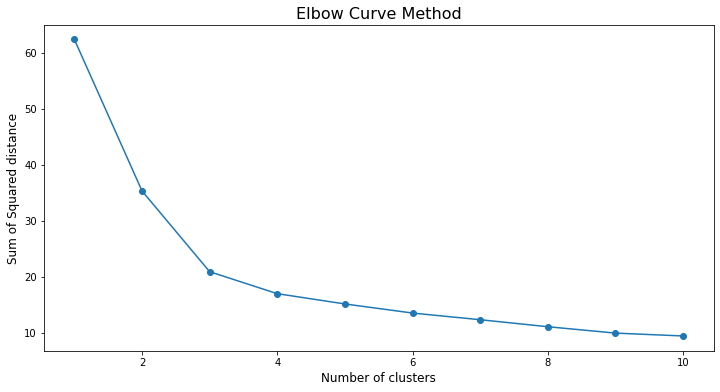

In [49]:
# Plot the SSD's for each n clusters.

plt.figure(figsize=(12,6))
plt.plot(range_of_clusters, ssd, marker = 'o')
plt.title('Elbow Curve Method', fontsize = 16)
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Sum of Squared distance', fontsize = 12)
plt.show()

#### Observation:
- From above plot we can see that the optimal number of cluster will be 3. since after cluster number 3 that curve is decreasing.

### 8.1.2. Silhouette Analysis.

In [50]:
# Perform Silhouette Analysis to know optimal number of clusters.

range_of_clusters = list(range(2,11))
ss = []

for cluster in range_of_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters= cluster, max_iter = 50)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = round(silhouette_score(country_scaled, cluster_labels),4)
    ss.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4614
For n_clusters=3, the silhouette score is 0.4417
For n_clusters=4, the silhouette score is 0.4187
For n_clusters=5, the silhouette score is 0.3084
For n_clusters=6, the silhouette score is 0.3014
For n_clusters=7, the silhouette score is 0.3107
For n_clusters=8, the silhouette score is 0.3215
For n_clusters=9, the silhouette score is 0.3077
For n_clusters=10, the silhouette score is 0.2674


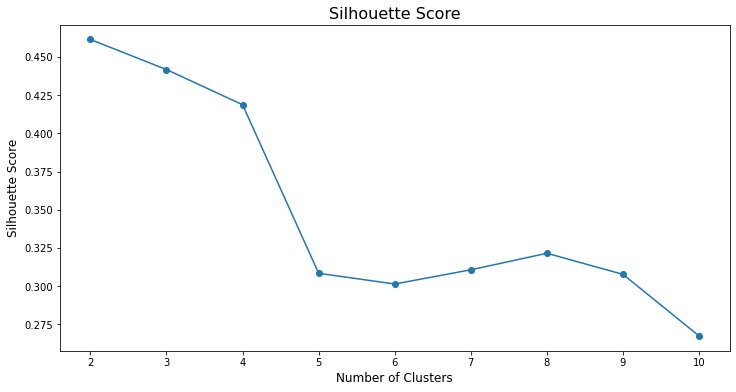

In [51]:
plt.figure(figsize=(12,6))
plt.plot(range_of_clusters, pd.DataFrame(ss)[0], marker = 'o')
plt.title('Silhouette Score', fontsize = 16)
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Silhouette Score', fontsize = 12)
plt.show()

#### Observation:
- In above plot we can observe that after cluster 3 the score is decreasing so we will choose cluster K = 3.

With above two methods to select optimum cluster we would choose 3 clusters.

### 8.1.3. Run K-Means with the chosen K

In [52]:
# Perform K-Mean with k = 3.

kmeans = KMeans(n_clusters = 3, max_iter = 50, random_state= 50)
kmeans.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [53]:
# Get the labels of clusters to each country in dataset.

kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [54]:
# Get new dataframe to all cluster labels with original dataset.

country_kmeans = country.copy()
country_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [55]:
# Merge the cluster id and dataframe of countries.

country_kmeans['Cluster_ID'] = kmeans.labels_
country_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [56]:
# Cheking the number contries in each cluster.

country_kmeans.Cluster_ID.value_counts()

0    92
1    46
2    29
Name: Cluster_ID, dtype: int64

### 8.1.4. Visualize the Clusters.

In [57]:
# Checking the count of countries in each cluster.

country_kmeans.Cluster_ID.value_counts()

0    92
1    46
2    29
Name: Cluster_ID, dtype: int64

In [58]:
# Checking the countries in the cluster id = 0.

Kmean_Cluster_0 = country_kmeans[country_kmeans['Cluster_ID'] == 0]
Kmean_Cluster_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,0


In [59]:
# Checking the countries in the cluster id = 1.

Kmean_Cluster_1 = country_kmeans[country_kmeans['Cluster_ID'] == 1]
Kmean_Cluster_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,1


In [60]:
# Checking the countries in the cluster id = 2.

Kmean_Cluster_2 = country_kmeans[country_kmeans['Cluster_ID'] == 2]
Kmean_Cluster_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,2
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,2
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,2


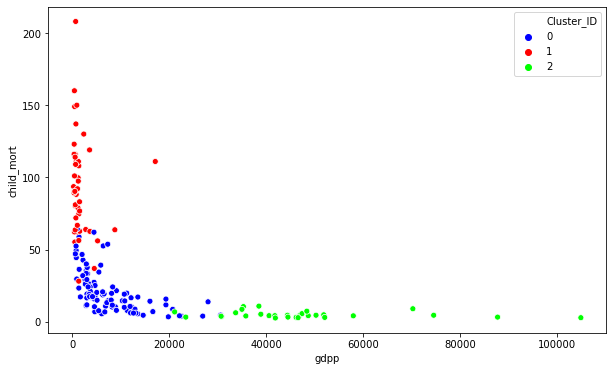

In [61]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize = (10, 6))
sns.scatterplot(x ='gdpp', y ='child_mort', hue ='Cluster_ID', data = country_kmeans, palette = "brg")
plt.show()

#### Observation:
- We can now see the cluster for gdpp and child_mort in every country in its specific cluster.

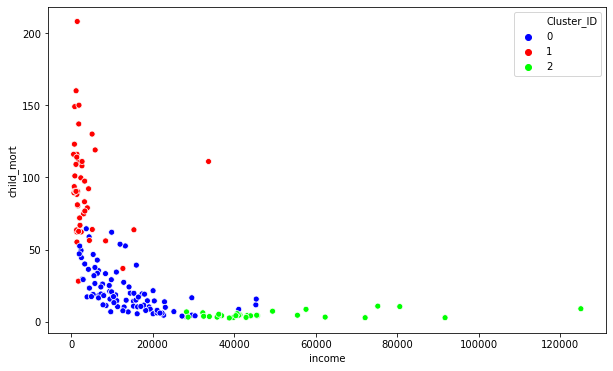

In [62]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'Cluster_ID', data = country_kmeans, palette = "brg")
plt.show()

#### Observation:
- We can now see the cluster for income and child_mort in every country in its specific cluster.

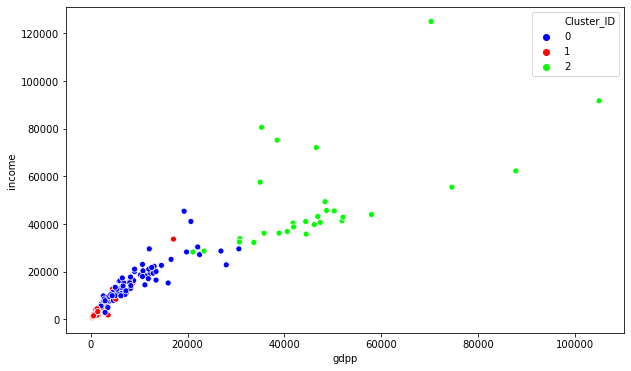

In [63]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'Cluster_ID', data = country_kmeans, palette = "brg")
plt.show()

#### Observation:
- We can now see the cluster for gdpp and income in every country in its specific cluster.

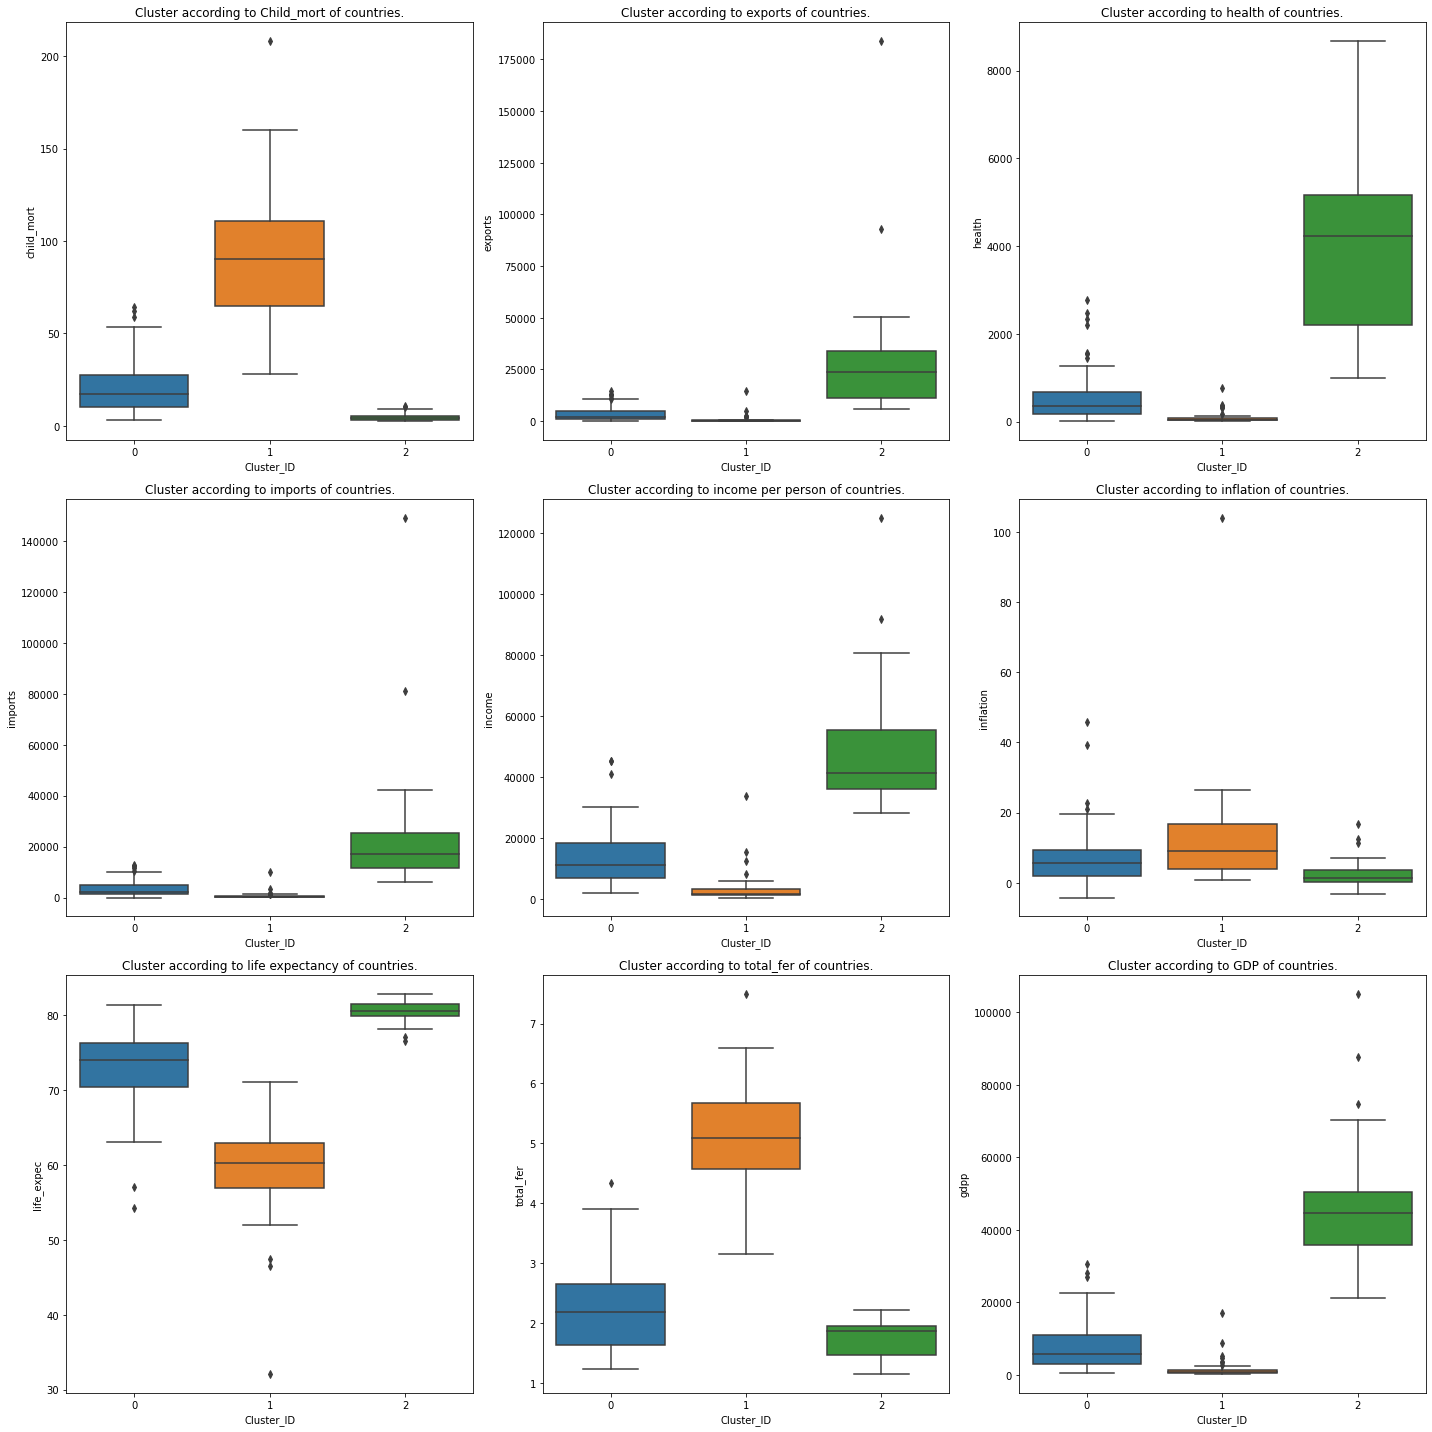

In [64]:
# plot the cluster for each column in dataframe.

plt.figure(figsize = (20, 20))

plt.subplot(3, 3, 1)
sns.boxplot(x = 'Cluster_ID', y = 'child_mort', data = country_kmeans)
plt.title("Cluster according to Child_mort of countries.", fontsize = 12)

plt.subplot(3, 3, 2)
sns.boxplot(x = 'Cluster_ID', y = 'exports', data = country_kmeans)
plt.title("Cluster according to exports of countries.", fontsize = 12)

plt.subplot(3, 3, 3)
sns.boxplot(x = 'Cluster_ID', y = 'health', data = country_kmeans)
plt.title("Cluster according to health of countries.", fontsize = 12)

plt.subplot(3, 3, 4)
sns.boxplot(x = 'Cluster_ID', y = 'imports', data = country_kmeans)
plt.title("Cluster according to imports of countries.", fontsize = 12)

plt.subplot(3, 3, 5)
sns.boxplot(x = 'Cluster_ID', y = 'income', data = country_kmeans)
plt.title("Cluster according to income per person of countries.", fontsize = 12)

plt.subplot(3, 3, 6)
sns.boxplot(x = 'Cluster_ID', y = 'inflation', data = country_kmeans)
plt.title("Cluster according to inflation of countries.", fontsize = 12)

plt.subplot(3, 3, 7)
sns.boxplot(x = 'Cluster_ID', y = 'life_expec', data = country_kmeans)
plt.title("Cluster according to life expectancy of countries.", fontsize = 12)

plt.subplot(3, 3, 8)
sns.boxplot(x = 'Cluster_ID', y = 'total_fer', data = country_kmeans)
plt.title("Cluster according to total_fer of countries.", fontsize = 12)

plt.subplot(3, 3, 9)
sns.boxplot(x = 'Cluster_ID', y = 'gdpp', data = country_kmeans)
plt.title("Cluster according to GDP of countries.", fontsize = 12)

plt.tight_layout()
plt.show()

#### Observation
- Its clearly showing that the cluster 2 having highest child mortality rate and lowest income and GDP rates. which comes in undeveloped countries.

### 8.1.5. Clustering profiling using 'gdpp', 'child_mort' and 'income'.

In [65]:
# Create new dataframe for group by & storing mean of clusters.

country_kmeans_profiling = country_kmeans.groupby(['Cluster_ID']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
country_kmeans_profiling

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_ID,,,,,,,,,
1,93.284783,811.834109,94.207885,748.806761,3516.804348,12.097065,59.393478,5.090217,1695.913043
0,21.255435,3454.153027,530.199700,3567.220555,13779.239130,7.170402,73.008696,2.253152,7786.978261
2,4.982759,30486.789655,4253.879655,25435.358621,49437.931034,2.876690,80.479310,1.754138,47262.068966


- From this mean values of clusters we can observe that the all three cluster showing good distance between each of them.
- The columns gdpp, income, and child_mort shows good inter cluster distance.


- From this we can say that three clusters defining the 3 types of contries.
    - Cluster 2 - Developed Country
    - Cluster 1 - Undeveloped Country
    - Cluster 0 - Developing Country

In [66]:
# Creating a new column for count of countries in each cluster.

country_kmeans_profiling['Count_of_countries_in_each_cluster'] = country_kmeans[['Cluster_ID','child_mort']].groupby(['Cluster_ID']).count()

# Creating a new column for proportion of count of contries in each cluster

country_kmeans_profiling['Proportion'] = round(country_kmeans_profiling['Count_of_countries_in_each_cluster']/country_kmeans_profiling['Count_of_countries_in_each_cluster'].sum(),2)

In [67]:
# Check the result of two newly added columns.

country_kmeans_profiling

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Count_of_countries_in_each_cluster,Proportion
Cluster_ID,,,,,,,,,,,
1,93.284783,811.834109,94.207885,748.806761,3516.804348,12.097065,59.393478,5.090217,1695.913043,46,0.28
0,21.255435,3454.153027,530.199700,3567.220555,13779.239130,7.170402,73.008696,2.253152,7786.978261,92,0.55
2,4.982759,30486.789655,4253.879655,25435.358621,49437.931034,2.876690,80.479310,1.754138,47262.068966,29,0.17


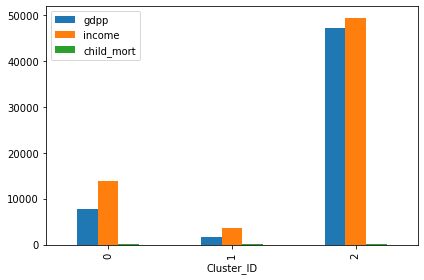

In [68]:
# Plotting a bar plot to visualize between gdpp, income and child_mort against cluster labels.

profiling_plot = country_kmeans[['Cluster_ID', 'gdpp', 'income', 'child_mort']].copy()
profiling_plot = profiling_plot.groupby('Cluster_ID').mean()
profiling_plot.plot.bar()
plt.tight_layout()
plt.show()

- In the above plot the bar of child_mort is not get visualised properly  
- So plot a new graph between child_mort and Cluster labels.

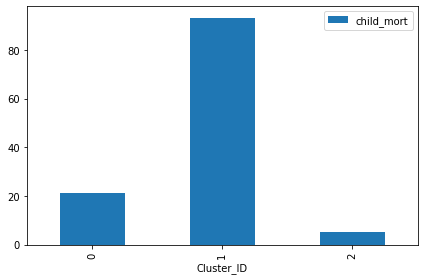

In [69]:
# Plotting a bar plot to visualize between child_mort against cluster labels.

profiling_plot_2 = country_kmeans[['Cluster_ID', 'child_mort']].copy()
profiling_plot_2 = profiling_plot_2.groupby('Cluster_ID').mean()
profiling_plot_2.plot.bar()
plt.tight_layout()
plt.show()

#### Observation:
- From above plot we can observe that the cluster 1 has highest child mortality rate and lowest income and GDP rate contries.
- So the contries which are needed the aid are belongs from cluster 1.

In [70]:
# To get the top 5 contries which need aid we need to sort based on 'child_mort','income','gdpp' in respective order.

Undeveloped_Countries_Cluster = country_kmeans[country_kmeans['Cluster_ID'] == 1]

Top_5_Countries = Undeveloped_Countries_Cluster.sort_values(by = ['gdpp','income','child_mort'], ascending=[True, False, True]).head(5)

In [71]:
Top_5_Countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,1
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,1


#### Observation:
- Top 5 contries which need aid by k-means clustering are :
    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep.
    4. Niger
    5. Sierra Leone

### 8.2. Hierarchical Clustering.

In [72]:
# Check the dataframe which we will use for this Hierarchical Clustering.

country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.000837,0.003465,0.004473,0.011950,0.298752,0.479411,0.863216,0.004083
1,0.068160,0.017658,0.030375,0.035887,0.111276,0.190414,0.879252,0.092421,0.048937
2,0.120253,0.026416,0.020620,0.025280,0.146732,0.444517,0.883231,0.321627,0.053629
3,0.566699,0.033925,0.010454,0.027338,0.063165,0.582403,0.556992,0.926063,0.041835
4,0.037488,0.085656,0.086078,0.129764,0.220749,0.123659,0.889198,0.181146,0.151781


### <font color = Brown> Use both Single and Complete linkage.

### 8.2.1. Single Linkage. 

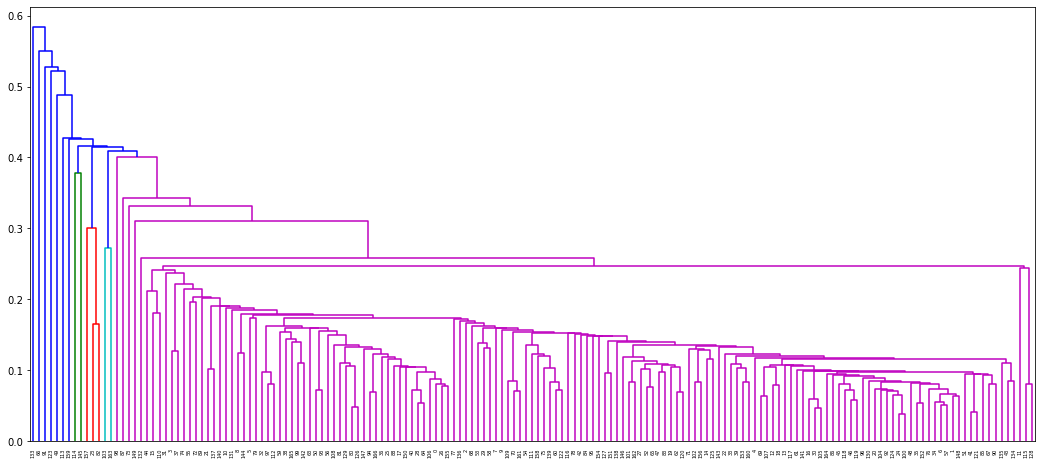

In [73]:
# Using the Single Linkage method for clustering.

plt.figure(figsize = (18,8))
mergings = linkage(country_scaled, method = "single", metric = 'euclidean')
dendrogram(mergings)
plt.show()

#### Observation:
- From above dendrogram we cannot clearly get the clusters.
- In above plot some clusters has very few values.
- By using single linkage we cannot get a proper cut_tree so we can form meaningful clusters.
- Hence we need to ahead and try Complete Linkage method.

### 8.2.2. Complete Linkage.

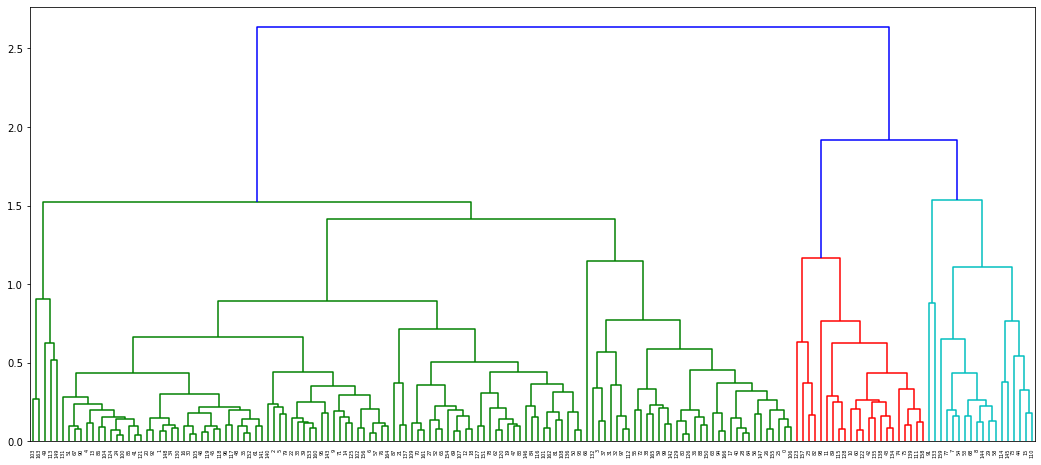

In [74]:
# Using the Complete Linkage method for clustering.

plt.figure(figsize = (18,8))
mergings = linkage(country_scaled, method = "complete", metric = 'euclidean')
dendrogram(mergings)
plt.show()

#### Observation:
- From above dendrogram we can observe that the complete linkage providing better clusters than single linkage.
- By using above dendrogram we can cut_tree in 3 clusters.

### 8.2.3. Choose one method based on results.

From single and Complete linkage method we will choose complete linkage method since it provides good clusters.

In [75]:
# Creating the labels for each country in dataset to classify them in their respective cluster.

Cluster_Labels = cut_tree(mergings, n_clusters = 3).reshape(-1, )
Cluster_Labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0])

In [76]:
# Merge the cluster labels with original dataframe and assign cluster labels.

country_kmeans['Cluster_ID_By_H'] = Cluster_Labels
country_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,Cluster_ID_By_H
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


### 8.2.4. Visualize the Clusters.

In [77]:
# Checking the count of contries in each cluster.

country_kmeans.Cluster_ID_By_H.value_counts()

0    127
2     22
1     18
Name: Cluster_ID_By_H, dtype: int64

In [78]:
# Checking the countries in the cluster id = 0.

Hierarchical_Cluster_0 = country_kmeans[country_kmeans['Cluster_ID_By_H'] == 0]
Hierarchical_Cluster_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,Cluster_ID_By_H
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [79]:
# Checking the countries in the cluster id = 1.

Hierarchical_Cluster_1 = country_kmeans[country_kmeans['Cluster_ID_By_H'] == 1]
Hierarchical_Cluster_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,Cluster_ID_By_H
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,2,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,2,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,2,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,2,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,2,1


In [80]:
# Checking the countries in the cluster id = 2.

Hierarchical_Cluster_2 = country_kmeans[country_kmeans['Cluster_ID_By_H'] == 2]
Hierarchical_Cluster_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,Cluster_ID_By_H
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,0,2
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,0,2
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,2,2
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,2,2
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,0,2


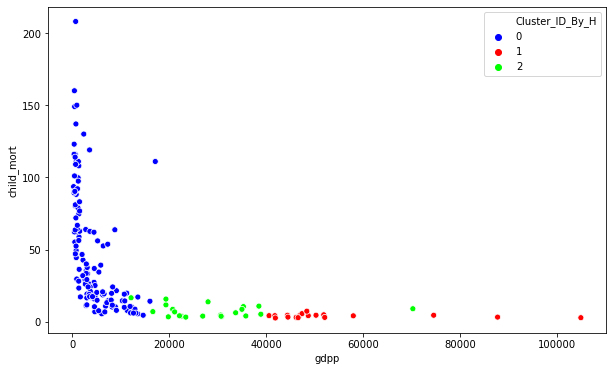

In [81]:
# Scatter plot on various variables to visualize the clusters based on them
# Here we are plotting for gdpp and child_mort.

plt.figure(figsize = (10, 6))
sns.scatterplot(x ='gdpp', y ='child_mort', hue ='Cluster_ID_By_H', data = country_kmeans, palette = "brg")
plt.show()

#### Observation:
- We can now see the cluster for gdpp and child_mort in every country in its specific cluster.

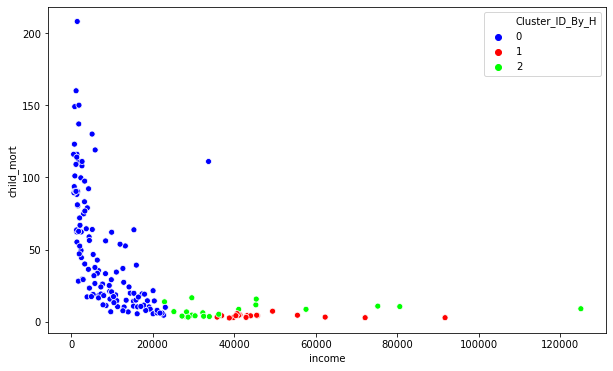

In [82]:
# Scatter plot on various variables to visualize the clusters based on them
# Here we are plotting for income and child_mort.

plt.figure(figsize = (10, 6))
sns.scatterplot(x ='income', y ='child_mort', hue ='Cluster_ID_By_H', data = country_kmeans, palette = "brg")
plt.show()

#### Observation:
- We can now see the cluster for income and child_mort in every country in its specific cluster.

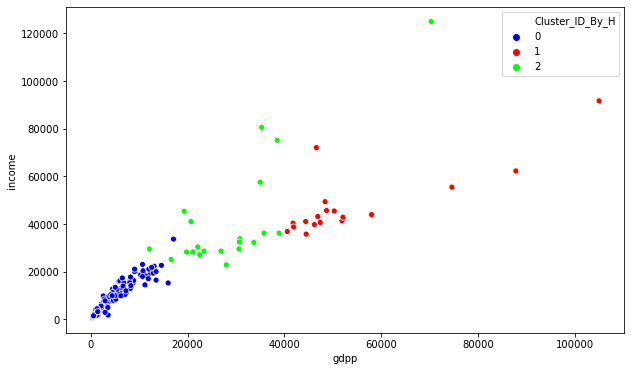

In [83]:
# Scatter plot on various variables to visualize the clusters based on them
# Here we are plotting for gdpp and income.

plt.figure(figsize = (10, 6))
sns.scatterplot(x ='gdpp', y ='income', hue ='Cluster_ID_By_H', data = country_kmeans, palette = "brg")
plt.show()

#### Observation:
- We can now see the cluster for gdpp and income in every country in its specific cluster.

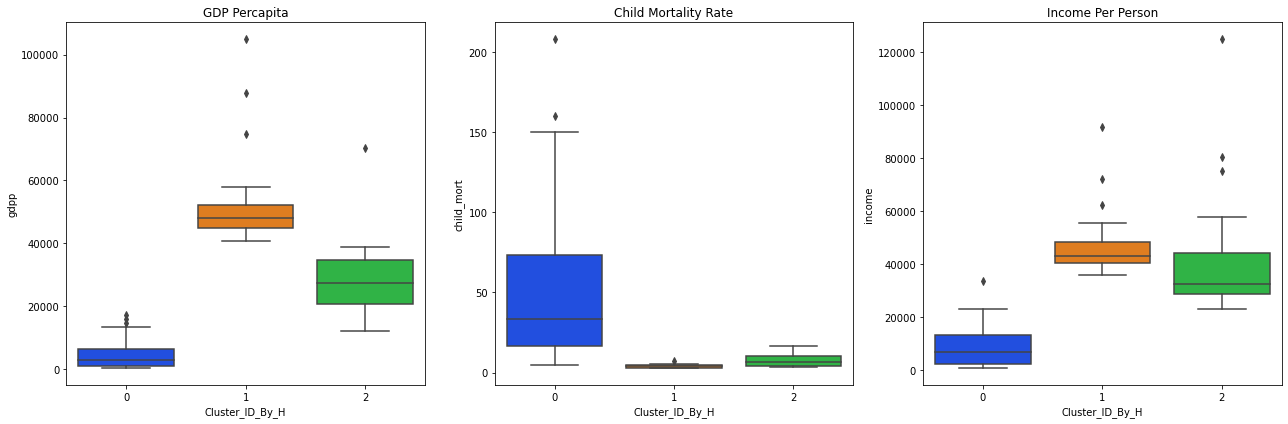

In [84]:
# Visualising clusters using boxplot for mainly three columns.

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(x = 'Cluster_ID_By_H', y = 'gdpp', data = country_kmeans, palette = "bright")
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.boxplot(x = 'Cluster_ID_By_H', y = 'child_mort', data = country_kmeans, palette = "bright")
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.boxplot(x = 'Cluster_ID_By_H', y = 'income', data = country_kmeans, palette = "bright")
plt.title('Income Per Person')

plt.tight_layout()
plt.show()

#### Observation:
- Its clearly showing that the cluster 0 having highest Child Mortality and lowest Income & GDPP and its comes under undevloped conutries

### 8.2.5. Clustering profiling using 'gdpp', 'child_mort' and 'income'.

In [85]:
#New dataframe for group by & analysis

country_Hierarchical_profiling = country_kmeans.groupby(['Cluster_ID_By_H']).mean()
country_Hierarchical_profiling

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
Cluster_ID_By_H,,,,,,,,,,
0,48.451181,1895.400374,282.759804,2032.460646,8470.574803,9.108614,67.693701,3.299843,4382.000000,0.362205
1,4.044444,36823.972222,5524.110000,31818.944444,48177.777778,1.411778,81.005556,1.756111,54283.333333,2.000000
2,7.500000,15258.909091,1869.544091,12245.059091,41827.272727,5.334545,78.527273,1.891818,28700.000000,1.000000


In [86]:
# Creating a new field for count of observations/countries in each cluster.

country_Hierarchical_profiling['H_Observations'] = country_kmeans[['Cluster_ID_By_H', 'child_mort']].groupby(['Cluster_ID_By_H']).count()
country_Hierarchical_profiling

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,H_Observations
Cluster_ID_By_H,,,,,,,,,,,
0,48.451181,1895.400374,282.759804,2032.460646,8470.574803,9.108614,67.693701,3.299843,4382.000000,0.362205,127
1,4.044444,36823.972222,5524.110000,31818.944444,48177.777778,1.411778,81.005556,1.756111,54283.333333,2.000000,18
2,7.500000,15258.909091,1869.544091,12245.059091,41827.272727,5.334545,78.527273,1.891818,28700.000000,1.000000,22


In [87]:
# Creating a new field for proportion of observations/countries in each cluster

country_Hierarchical_profiling['H_Proportion'] = round(country_Hierarchical_profiling['H_Observations'] / (country_Hierarchical_profiling['H_Observations'].sum()),2)
country_Hierarchical_profiling

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,H_Observations,H_Proportion
Cluster_ID_By_H,,,,,,,,,,,,
0,48.451181,1895.400374,282.759804,2032.460646,8470.574803,9.108614,67.693701,3.299843,4382.000000,0.362205,127,0.76
1,4.044444,36823.972222,5524.110000,31818.944444,48177.777778,1.411778,81.005556,1.756111,54283.333333,2.000000,18,0.11
2,7.500000,15258.909091,1869.544091,12245.059091,41827.272727,5.334545,78.527273,1.891818,28700.000000,1.000000,22,0.13


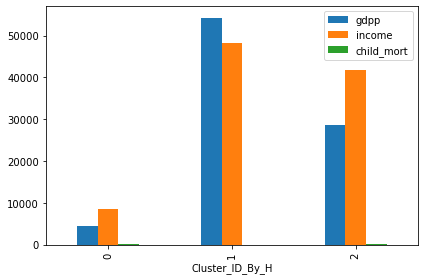

In [88]:
# Plotting a bar plot to visualize between gdpp, income and child_mort against cluster labels.

profiling_plot = country_kmeans[['Cluster_ID_By_H', 'gdpp', 'income', 'child_mort']].copy()
profiling_plot = profiling_plot.groupby('Cluster_ID_By_H').mean()
profiling_plot.plot.bar()
plt.tight_layout()
plt.show()

- In the above plot the bar of child_mort is not get visualised properly  
- So plot a new graph between child_mort and Cluster labels.

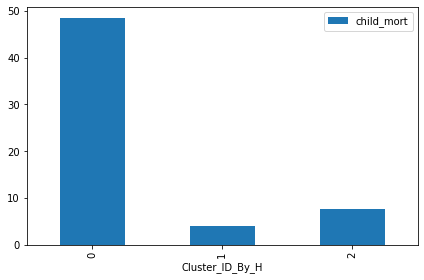

In [89]:
# Plotting a bar plot to visualize between child_mort against cluster labels.

profiling_plot_2 = country_kmeans[['Cluster_ID_By_H', 'child_mort']].copy()
profiling_plot_2 = profiling_plot_2.groupby('Cluster_ID_By_H').mean()
profiling_plot_2.plot.bar()
plt.tight_layout()
plt.show()

#### Observation:
1. From above plot we can observe that the cluster 0 has highest child mortality rate and lowest income and GDP rate contries.
2. So the contries which are needed the aid are belongs from cluster 0.
3. From this we can say that three clusters defining the 3 types of contries.

    - Cluster 0 - Undeveloped Country
    - Cluster 1 - Developed Country
    - Cluster 2 - Developing Country

In [90]:
# To get the top 5 contries which need aid we need to sort based on 'child_mort','income','gdpp' in respective order.

Undeveloped_Countries_Cluster_By_H = country_kmeans[country_kmeans['Cluster_ID_By_H'] == 0]

Top_5_Countries = Undeveloped_Countries_Cluster_By_H.sort_values(by = ['gdpp','income','child_mort'], ascending=[True, True, False]).head(5)

In [91]:
Top_5_Countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,Cluster_ID_By_H
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,1,0


#### Observation:
- Top 5 contries which need aid by Hierarchical Clustering are :
    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep.
    4. Niger
    5. Sierra Leone

### 9. Country Identification.

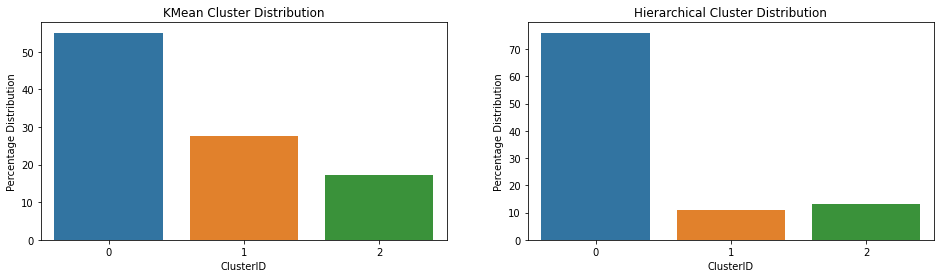

In [92]:
# boxplot for cluster distribution.

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
Kmeans_cluster_percentage = country_kmeans.Cluster_ID.value_counts(normalize = True)*100
sns.barplot(x = Kmeans_cluster_percentage.index, y = Kmeans_cluster_percentage)
plt.title('KMean Cluster Distribution')
plt.xlabel('ClusterID')
plt.ylabel('Percentage Distribution')

plt.subplot(1,2,2)
Hierarchical_cluster_percentage = country_kmeans.Cluster_ID_By_H.value_counts(normalize = True)*100
sns.barplot(x = Hierarchical_cluster_percentage.index, y = Hierarchical_cluster_percentage)
plt.title('Hierarchical Cluster Distribution')
plt.xlabel('ClusterID')
plt.ylabel('Percentage Distribution')
plt.show()

#### Observation:
- Above plot shows the percentage of values in every cluster by both K-means and Hierarchical Clustering Method.
- From above plot we can observe that the K-means method providing better cluster classification for this case.
- Since both K-means and Hierarchical methods providing the same contries which needed aid both method providing good result.
- But for overall result the K-means result is better in this case.

### 9.1. Based on the analysis, choose the countries that are in need for the aid. and Choose the countries based on some socio-economic and health factors.

After performed clustering on the socio-economic data provided for various countries to identify countries to recommend for Financial Aid from the NGO.
Based on analysis the contries which needed the aid are from 'Undeveloped' countries.

<font color = 'Voilet'>The Top 5 countries which needed the aid are:
    
   1. Burundi
   2. Liberia
   3. Congo, Dem. Rep.
   4. Niger
   5. Sierra Leone